In [24]:
import pandas as pd

data = pd.read_csv('../data/processed/processed.csv')

In [25]:
from sklearn.cluster import AgglomerativeClustering
import itertools

affinities = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages = ['complete', 'average', 'single', 'ward']
combinations = list(itertools.product(affinities, linkages[:-1]))

# Ward can only be combined with euclidean distance
combinations.append(('euclidean','ward'))


In [26]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
import math
scores = []
thresholds = [i/10 for i in range(1,101)]

for affinity, linkage in combinations: 
    for threshold in thresholds: 
        ac = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage, distance_threshold=threshold)
        prediction = ac.fit_predict(X=data)
        if ac.n_clusters_ == 1 or ac.n_clusters_ == len(data):
            sc, db, ch = -math.inf,math.inf, -math.inf
        else:
            sc = silhouette_score(data, prediction)
            db = davies_bouldin_score(data, prediction)
            ch = calinski_harabasz_score(data, prediction)
        scores.append((affinity, linkage, threshold, sc, db, ch, prediction, ac.n_clusters_))


In [27]:
tested_affinities, tested_linkages, thresholds, scs, dbs, chs, predictions, n_clusters = zip(*scores)

In [28]:
placings_per_alt = {}

for i in range(len(scores)):
    placings_per_alt[(tested_affinities[i],tested_linkages[i],thresholds[i])] = {
        'affinity': tested_affinities[i],
        'linkage': tested_linkages[i],
        'threshold': thresholds[i],
        'silhouette coefficient': scs[i],
        'davies-bouldin index': dbs[i],
        'calinski-harabasz index': dbs[i],
        'prediction': predictions[i],
        'clusters': n_clusters[i]
    }

sorted_by_max_sc = sorted(scores, key=lambda score:score[3], reverse=True)
sorted_by_min_db = sorted(scores, key=lambda score:score[4], reverse=False)
sorted_by_max_ch = sorted(scores, key=lambda score:score[5], reverse=True)

for index, score in enumerate(sorted_by_max_sc):
    placings_per_alt[(score[0],score[1],score[2])]['max_sc'] = index

for index, score in enumerate(sorted_by_min_db):
    placings_per_alt[(score[0],score[1],score[2])]['min_db'] = index

for index, score in enumerate(sorted_by_max_ch):
    placings_per_alt[(score[0],score[1],score[2])]['max_ch'] = index



In [29]:

def overall_placing(score):
    alt = placings_per_alt[(score[0],score[1],score[2])]
    return (alt['max_sc']+alt['min_db']+alt['max_ch'])/3

sorted_scores_on_overall = sorted(scores, key=lambda score: overall_placing(score), reverse=False)

for index, score in enumerate(sorted_scores_on_overall):
    placings_per_alt[(score[0],score[1],score[2])]['overall'] = index

In [30]:
alts = sorted(placings_per_alt.values(),key=lambda alt:alt['overall'])
alts_list = [alt.values() for alt in alts]

In [31]:
sorted_test_affinities, sorted_test_linkasges, sorted_thresholds, sorted_scs, sorted_dbs, sorted_chs, sorted_predictions, sorted_clusters, sorted_placing_sc, sorted_placing_db, sorted_placing_ch, sorted_overall = zip(*alts_list)

In [32]:
def points_in_clusters(distribution):
    amount_of_points_in_cluster = {}
    for cluster_id in distribution:
        if cluster_id in amount_of_points_in_cluster:
            amount_of_points_in_cluster[cluster_id] += 1
        else:
            amount_of_points_in_cluster[cluster_id] = 1
    return tuple(amount_of_points_in_cluster.values())

In [33]:
for i in range(20):
    print(f'Place: {sorted_overall[i]}: {sorted_test_affinities[i]}, {sorted_test_linkasges[i]}, {sorted_thresholds[i]}')

Place: 0: euclidean, ward, 6.1
Place: 1: euclidean, ward, 6.2
Place: 2: euclidean, ward, 6.3
Place: 3: euclidean, ward, 6.4
Place: 4: euclidean, ward, 6.5
Place: 5: euclidean, ward, 6.6
Place: 6: euclidean, ward, 6.7
Place: 7: euclidean, ward, 6.8
Place: 8: euclidean, ward, 6.9
Place: 9: euclidean, complete, 2.3
Place: 10: euclidean, ward, 7.0
Place: 11: euclidean, complete, 2.4
Place: 12: euclidean, ward, 7.1
Place: 13: euclidean, complete, 2.5
Place: 14: euclidean, ward, 7.2
Place: 15: euclidean, average, 1.7
Place: 16: euclidean, ward, 7.3
Place: 17: l1, average, 3.6
Place: 18: euclidean, average, 1.8
Place: 19: euclidean, ward, 7.4


In [34]:
for i in range(20):
    print(points_in_clusters(sorted_predictions[i]))

(151, 59)
(151, 59)
(151, 59)
(151, 59)
(151, 59)
(151, 59)
(151, 59)
(151, 59)
(151, 59)
(209, 1)
(151, 59)
(209, 1)
(151, 59)
(209, 1)
(151, 59)
(209, 1)
(151, 59)
(155, 54, 1)
(209, 1)
(151, 59)


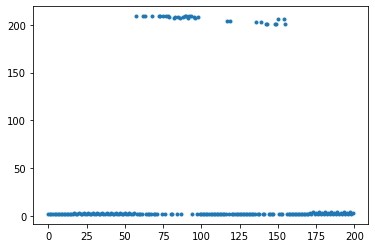

In [35]:
import matplotlib.pyplot as plt

plt.plot(sorted_overall[:200], sorted_clusters[:200],'.')

plt.show()

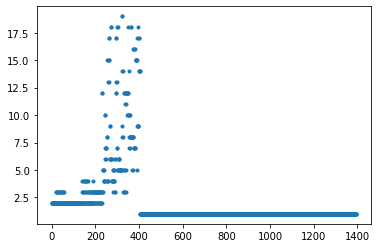

In [39]:
clusterings_under_20 = [cluster_amount for cluster_amount in sorted_clusters if cluster_amount < 20 ]

import matplotlib.pyplot as plt

plt.plot(clusterings_under_20, '.')

plt.show()